In [1]:
import pandas as pd

res_path = './result/'


def group_cal(pth: str):
    dt = pd.read_csv(res_path + pth)
    dt_a = dt.groupby('品牌', as_index=False).mean()
    dt_sz = dt.groupby('品牌', as_index=False).size()
    return pd.DataFrame(dt_a), pd.DataFrame(dt_sz)


In [27]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')


def draw_favor(dt: pd.DataFrame, pth='./'):
    kinds = dt.shape[0]
    fig, ax = plt.subplots(figsize=(8, kinds), dpi=120)
    dt = dt.sort_values(by='合计好评率', ascending=True)
    dt.plot(kind='barh', y=['最近好评率', '历史好评率', '合计好评率'], x='品牌', ax=ax)
    fig.suptitle((pth + '价位' if pth != '' else pth) + '不同品牌产品的好评率排名（合计好评率）')
    ax.set_xlim([0.6, 1.1])
    fig.savefig(res_path + pth + '_favor.png')


def draw_buys(dt: pd.DataFrame, pth=''):
    fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
    dt.plot(kind='pie', y='size', labels=sz['品牌'].tolist(), ax=ax)
    fig.suptitle((pth + '价位' if pth != '' else pth) + '销量前10各品牌产品占有率')
    ax.legend().set_visible(False)
    ax.set(ylabel='')
    fig.savefig(res_path + pth + '_buys.png')



In [3]:
import os
dirs = os.listdir(res_path)

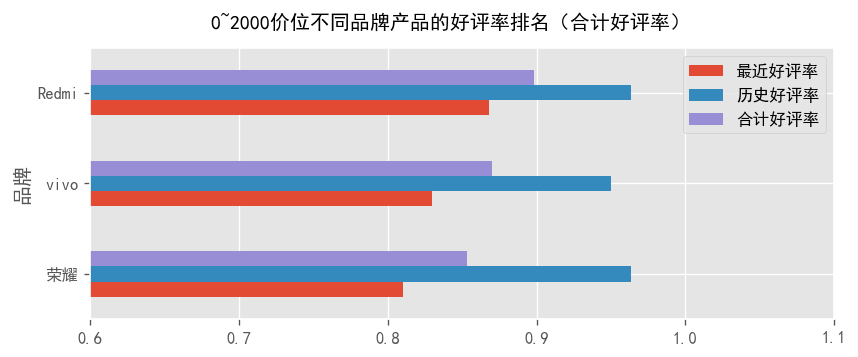

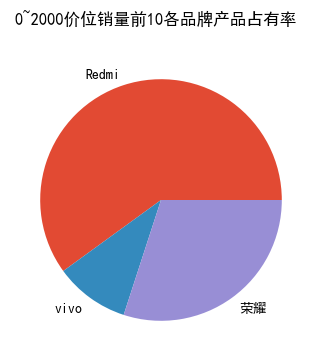

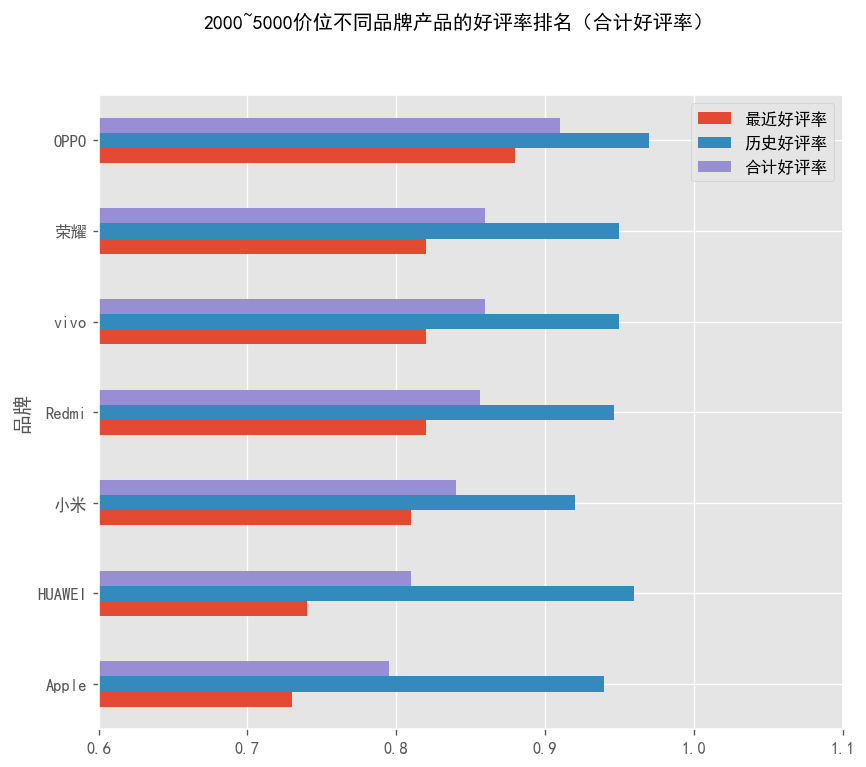

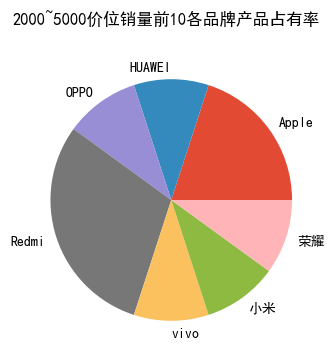

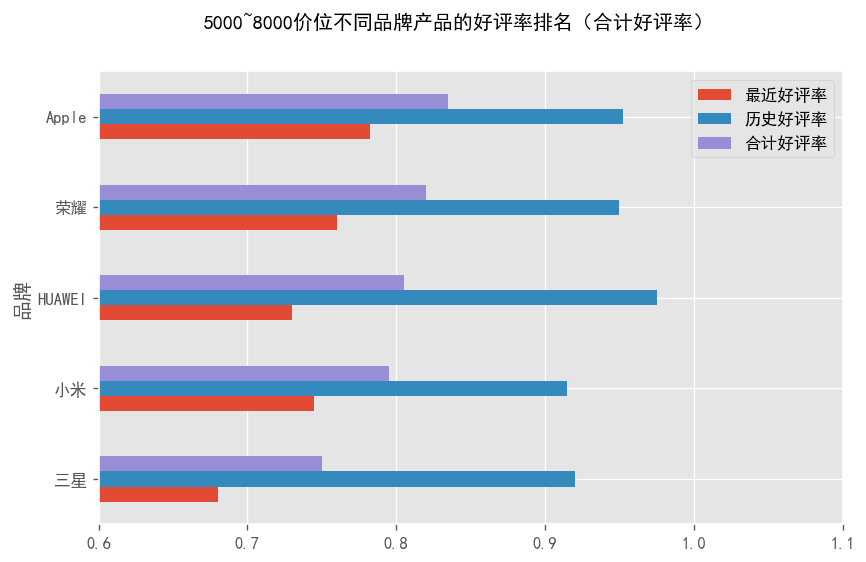

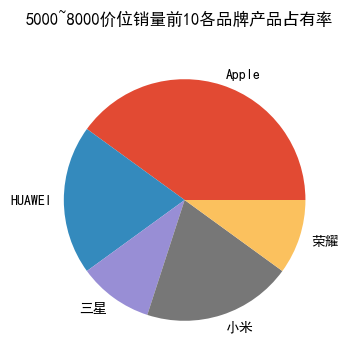

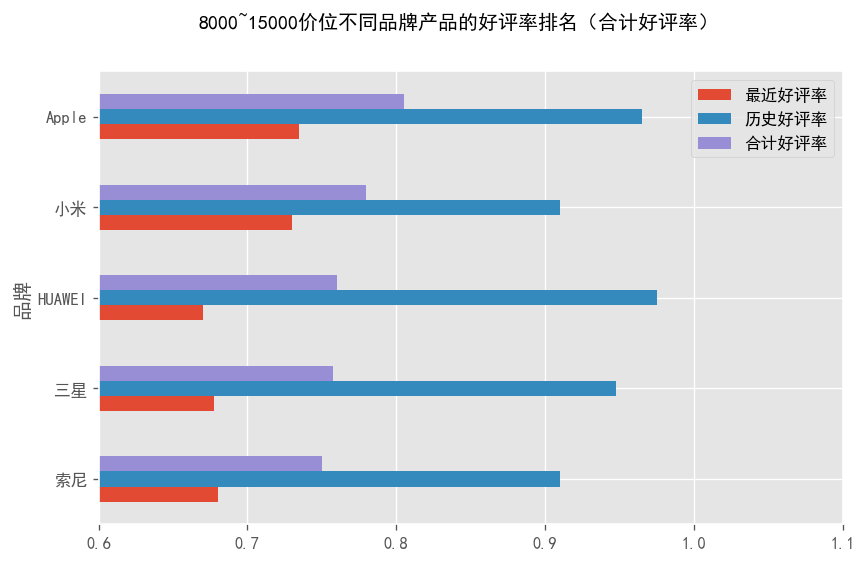

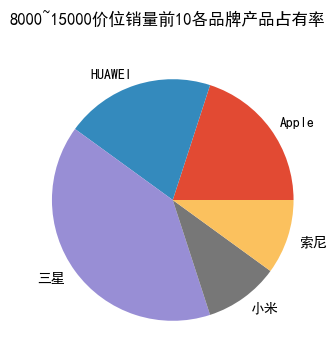

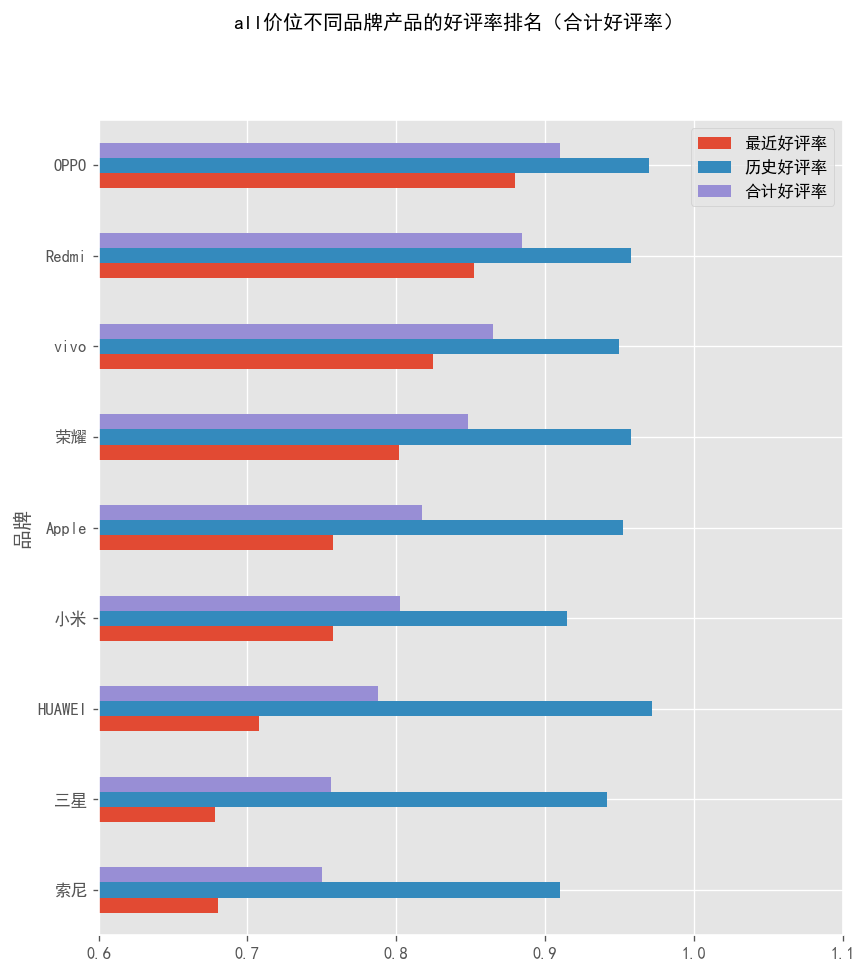

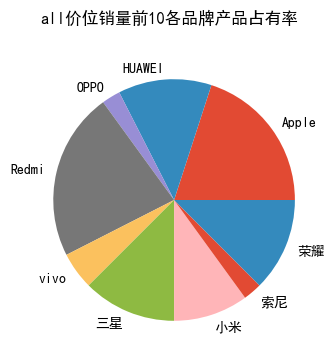

In [29]:
dicts = []
for fp in dirs:
    if not fp.endswith('csv'):
        continue
    res, sz = group_cal(fp)
    res = res.sort_values(by='合计好评率', ascending=False)
    # res.reset_index()

    now_range = fp.split('.')[0]
    draw_favor(res, now_range)
    draw_buys(sz, now_range)

    dic = dict(zip(res['品牌'], res['合计好评率']))
    # dic['range'] = now_range
    dicts.append(dic)

In [30]:
ranges = ['0~2000', '2000~5000', '5000~8000', '8000~15000', 'all']
ranges = pd.Series(ranges)

dtf = pd.DataFrame.from_dict(dicts)
dtf = dtf.set_index(ranges, drop=True)
dtf = dtf.drop('all')

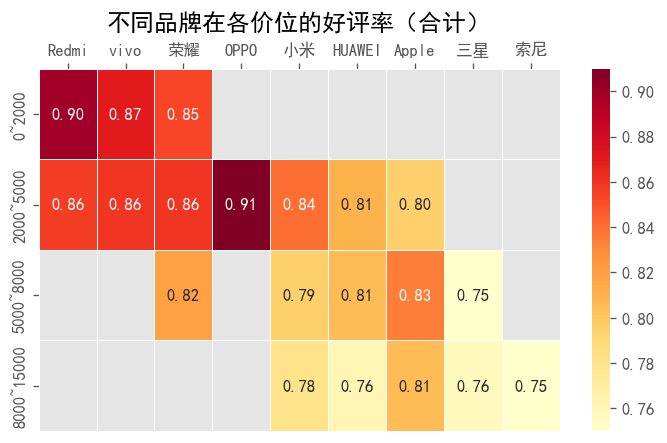

In [31]:
import seaborn as sns

plt.figure(figsize=(7, 4), dpi=120)
axis = sns.heatmap(dtf, annot=True, fmt='.2f', cmap="YlOrRd", linewidths=0.5, cbar=True)
axis.xaxis.tick_top()
axis.set_title('不同品牌在各价位的好评率（合计）')
plt.savefig(res_path + 'heatmap.png', dpi=120)

In [4]:
res, _ = group_cal(dirs[12])
res = res.sort_values(by='合计好评率', ascending=False)
res

,品牌,最近好评率,历史好评率,合计好评率
2,OPPO,0.880000,0.970000,0.910000
3,Redmi,0.852222,0.957778,0.884444
4,vivo,0.825000,0.950000,0.865000
8,荣耀,0.802000,0.958000,0.848000
0,Apple,0.757500,0.952500,0.817500
6,小米,0.757500,0.915000,0.802500
1,HUAWEI,0.708000,0.972000,0.788000
5,三星,0.678000,0.942000,0.756000
7,索尼,0.680000,0.910000,0.750000
